In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import random

df = pd.read_csv("spotify-2023.csv", encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [125]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [126]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [127]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.info

<bound method DataFrame.info of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_mo

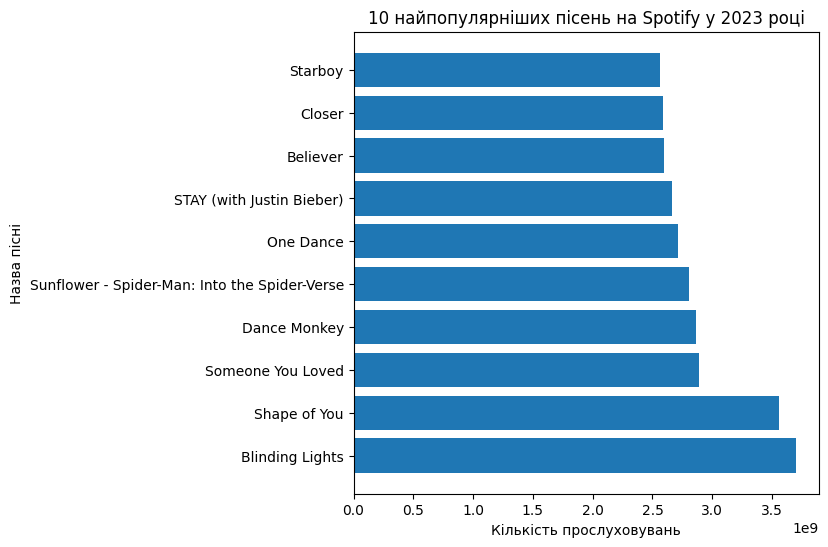

In [128]:
# 1. Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.

df_sorted = df.sort_values(by='streams', ascending=False)
top10_songs = df_sorted.head(10)
top10_songs


plt.figure(figsize=(6, 6))
plt.barh(top10_songs['track_name'], top10_songs['streams'])
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва пісні')
plt.title('10 найпопулярніших пісень на Spotify у 2023 році')
plt.show()

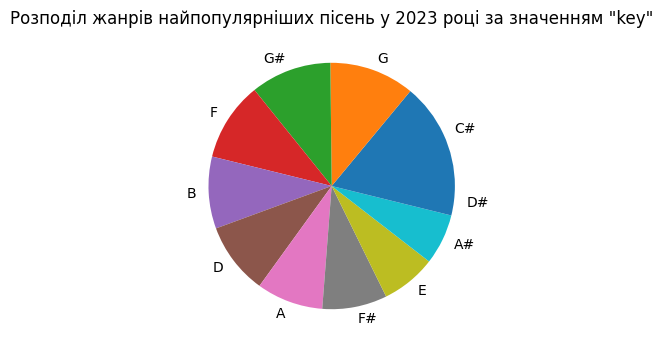

In [129]:
# 2. Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або секторну діаграму, яка відображає розподіл жанрів серед найпопулярніших пісень у 2023 році.

key_counts = df['key'].value_counts()
# key_counts

plt.figure(figsize=(4,4))
plt.pie(key_counts, labels=key_counts.index)

plt.title('Розподіл жанрів найпопулярніших пісень у 2023 році за значенням "key"')
plt.show()


In [130]:
df[(df['released_year'] == 2022) ]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,174,F#,Minor,52,66,73,34,0,31,6
15,Kill Bill,SZA,1,2022,12,8,8109,77,1163093654,183,...,89,G#,Major,64,43,73,5,17,16,4
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",2,2022,3,25,7112,77,899183384,202,...,107,B,Major,80,82,80,43,0,14,4
32,Creepin',"The Weeknd, 21 Savage, Metro Boomin",3,2022,12,2,6036,88,843957510,113,...,98,C#,Minor,71,17,61,36,0,8,5
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,...,97,E,Major,64,51,63,12,0,19,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Через нестачу необхідних даних у датасеті, я видозмінила завдання і збудувала графік кількості релізів певного виконавця у 2023 році.

D:\Nasti\Temp\ipykernel_5960\366866631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Artist_data['released_day'] = pd.to_datetime(Artist_data['released_day'])
D:\Nasti\Temp\ipykernel_5960\366866631.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Artist_data['season'] = ((Artist_data['released_day'].dt.month % 12 + 3) // 3).map({1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'})


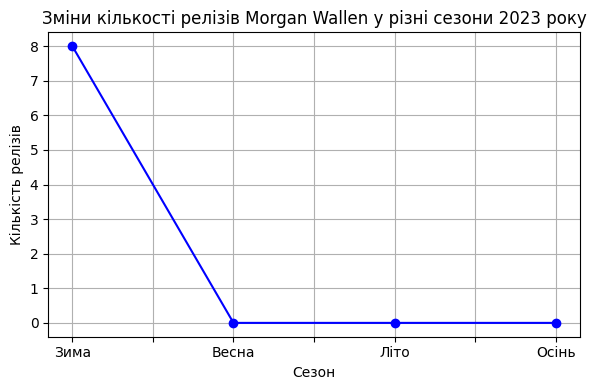

In [131]:
# 3. Динаміка популярності треку в залежності від часу: Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.



Artist_data = df[(df['artist(s)_name'] == 'Morgan Wallen') & (df['released_year'] == 2023)]

# Перетворення стовпця released_day у тип дати
Artist_data['released_day'] = pd.to_datetime(Artist_data['released_day'])

# Створення стовпця season на основі місяців та підрахунок релізів за сезонами
Artist_data['season'] = ((Artist_data['released_day'].dt.month % 12 + 3) // 3).map({1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'})
season_counts = Artist_data['season'].value_counts().reindex(['Зима', 'Весна', 'Літо', 'Осінь']).fillna(0)

plt.figure(figsize=(6, 4))
season_counts.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Сезон')
plt.ylabel('Кількість релізів')
plt.title(f'Зміни кількості релізів Morgan Wallen у різні сезони 2023 року')
plt.grid(True)
plt.tight_layout()
plt.show()



Text(0.5, 1.0, '10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів')

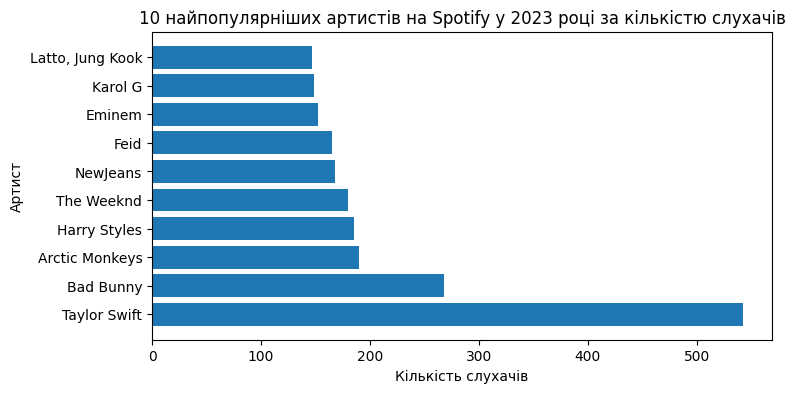

In [132]:
# 4. Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.

top_artists = df.groupby('artist(s)_name')['in_spotify_charts'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
plt.barh(top_artists.index, top_artists.values)
plt.xlabel('Кількість слухачів')
plt.ylabel('Артист')
plt.title('10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів')



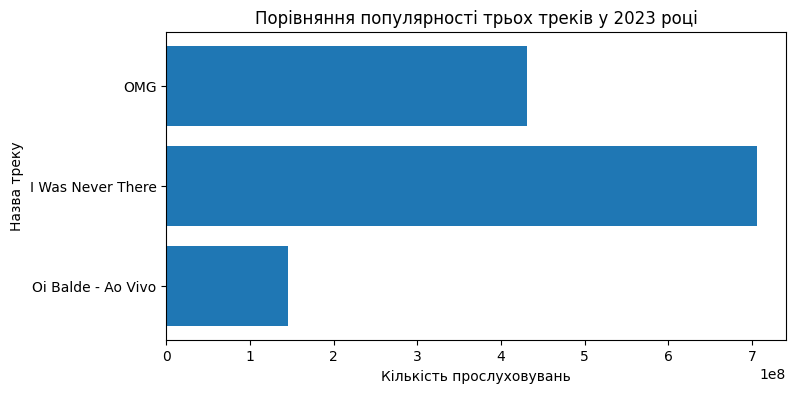

In [145]:
# 5. Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.

random_tracks = df.iloc[random.sample(range(1, 952), 3)]

tracks_data = random_tracks[['track_name', 'streams']]

plt.figure(figsize=(8, 4))
plt.barh(tracks_data['track_name'], tracks_data['streams'])
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва треку')
plt.title('Порівняння популярності трьох треків у 2023 році')
plt.show()
